## 统计方法实验五--Clustering--10215501435 杨茜雅


## 载入package

以下是运行本次实验中必要的package。

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig
from numpy import unique  
from numpy import where 

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## 参数设置

在本次实验中，我们采用取随机种子的方式构建数据集。随机种子取的是1；样本量为1500。在同学的作业中，保持样本量不变，随机种子取自己的学号后三位。

In [14]:
# ============
# Generate datasets
# ============
np.random.seed(435)
n_samples = 1500 # sample size

# ============
# Definitions of Fuctions
# ============
def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

### 搞一点颜色&忽略warnning

In [15]:
colors = ['red', 'green', 'blue','yellow','pink','purple','grey','orange','sandybrown','tan','gold','olive','Aqua','DeepSkyBlue','LightSlateGray','brown','LightCoral','hotpink','lightgoldenrodyellow','lightsteelblue','lightskyblue','mintcream','palegoldenrod','rosybrown','springgreen','whitesmoke']
import warnings
warnings.filterwarnings('ignore')


## 任务

本次实验中，采用人造数据的方式构建不同类型的点集。每个点集均是一个二维数据集$\{(x_{i,1},x_{i,2}),i=1,2,\cdots,n\}$。本次实验的目的是让同学们形象地理解不同的聚类方法在不同类型的数据集上的表现是不同的，而且能够掌握如何构造人工数据集，并以此可以用于聚类方法的比较。
1. 阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。
2. 采用不同的聚类方式（包括：自下而上的层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。
3. 请用绘图的方式展示不同聚类方式的结果。
4. 在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法。请写明具体的外（内）部聚类有效性的度量方法，并将计算结果请填入下表（结论保留小数点后4位有效数字）。

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
</table>

5. 通过本次实验，评述各类聚类方法的使用范围。

6. （选做）复现层次聚类、Kmeans、GMM、DBSCAN的代码。复现指的是通过理解原始代码的逻辑和功能，重新编写出一个具有相同功能的代码，只能使用最基础的包，如numpy、math等。

参考资料：https://scikit-learn.org/stable/modules/clustering.html#clustering

## Task1：阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。

以一组标准正态分布的数据点为基础，将其不等分为3份，奔驰形分割。三组数据量不相等。

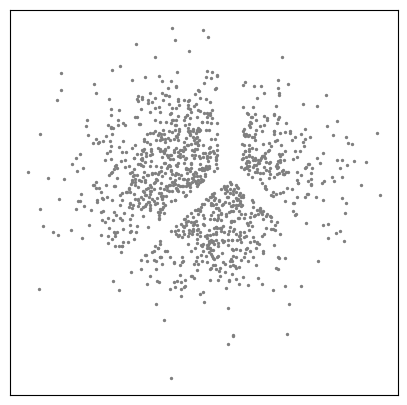

In [16]:
x = np.random.randn(n_samples, 2) # 二维
condition1 = x[:, 1] <= -0.4+x[:, 0] # y>=0.3+x
condition2 = x[:, 1] <= (0.6-x[:, 0]) # y>=1.3-x
index1 = np.where(condition1 & condition2) # 返回符合条件的元素坐标
x61 = x[index1]
condition3 = x[:, 1] <= x[:, 0] # y>=x
condition4 = x[:, 1] <= (1-x[:, 0]) # y>=1-x
index1_plus=np.where(condition3 & condition4)
x = np.delete(x, index1_plus, axis=0) # 排除后分两份

index2 = x[:, 0] <= 0.3 # 两份
x62 = x[index2]
index2_plus=x[:, 0] <= 0.7
x63 = np.delete(x, index2_plus, axis=0)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks([])
plt.yticks([])
plt.scatter(x61[:,0],x61[:,1],color="grey",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="grey",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="grey",s = 2)
plt.show()

dataset6 = np.r_[x61,x62,x63]
y61=[0 for i in range(x61.shape[0])]
y62=[1 for i in range(x62.shape[0])]
y63=[2 for i in range(x63.shape[0])]
y6_labels=y61+y62+y63

添上老师提供的另外5种人工数据集。

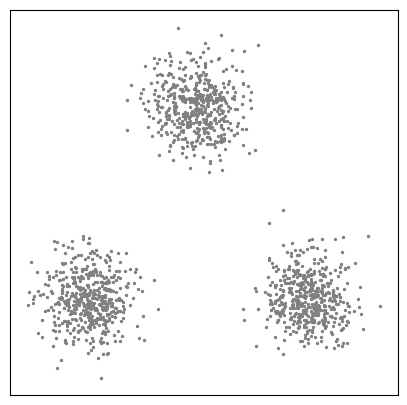

In [17]:
## Case One : Simple Case (Equal Variance and Equal Size)
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="grey",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="grey",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="grey",s = 2)


y11=[0 for i in range(n_subset)]
y12=[1 for i in range(n_subset)]
y13=[2 for i in range(n_subset)]
y1_labels=y11+y12+y13

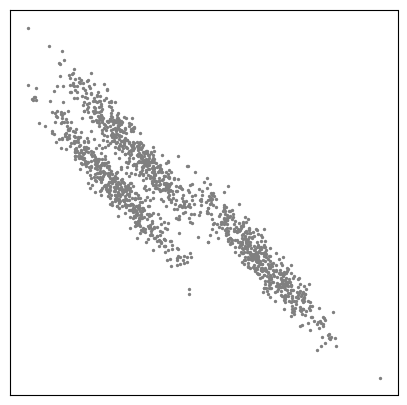

In [18]:
## Case Two : High-Covariance Case 
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="grey",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="grey",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="grey",s = 2)

y21=[0 for i in range(n_subset)]
y22=[1 for i in range(n_subset)]
y23=[2 for i in range(n_subset)]
y2_labels=y21+y22+y23

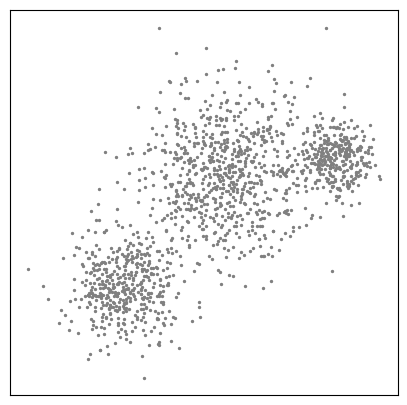

In [19]:
## Case Three : Unequal variance and Unequal size
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="grey",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="grey",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="grey",s = 2)

y31=[0 for i in range(n_subset1)]
y32=[1 for i in range(n_subset2)]
y33=[2 for i in range(n_subset3)]
y3_labels=y31+y32+y33

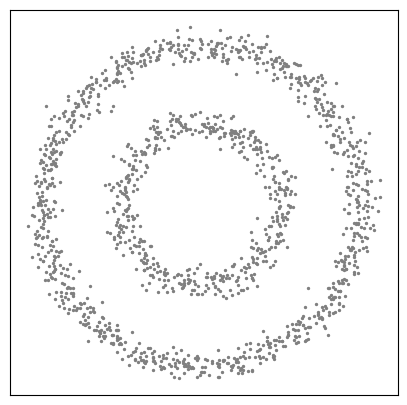

In [20]:
## Case Four : Ring Plot
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="grey",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="grey",s = 2)

y41=[0 for i in range(n_subset1)]
y42=[1 for i in range(n_subset2)]
y4_labels=y41+y42

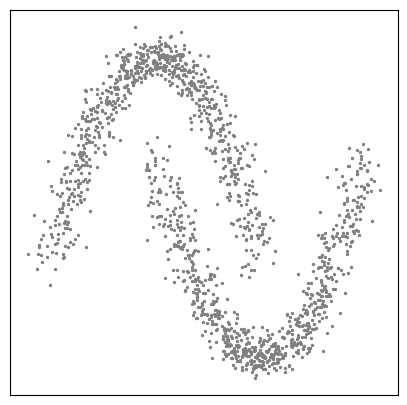

In [21]:
## Case Five : Wave Plot
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="grey",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="grey",s = 2)


y51=[0 for i in range(n_subset)]
y52=[1 for i in range(n_subset)]
y5_labels=y51+y52

## Task2：采用不同的聚类方式（包括：自下而上的层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。

### Case One : Simple Case (Equal Variance and Equal Size)

- 自下而上的层次聚类

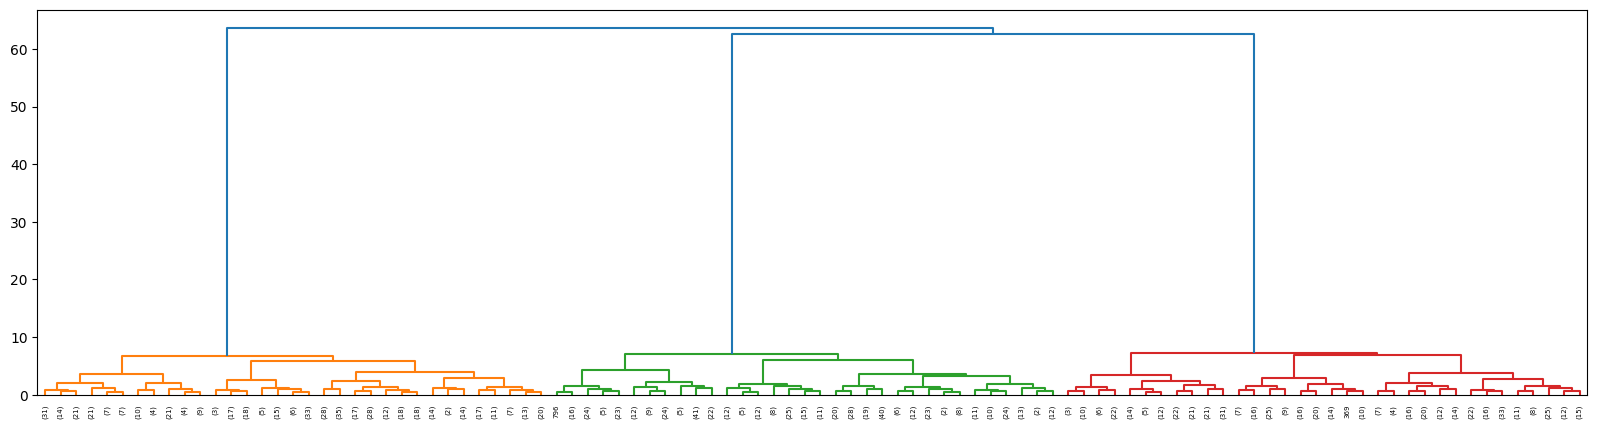

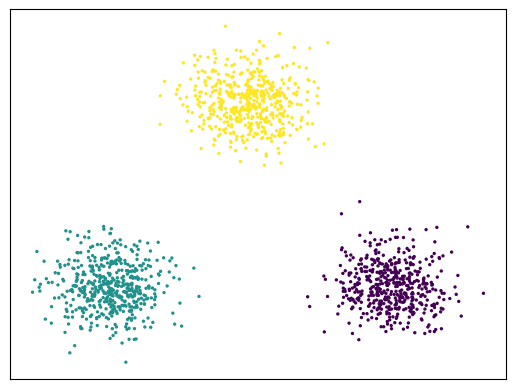

In [22]:
from scipy.cluster.hierarchy import linkage     #导入linage函数用于层次聚类
from scipy.cluster.hierarchy import dendrogram  #dendrogram函数用于将聚类结果绘制成树状图
from scipy.cluster.hierarchy import fcluster    #fcluster函数用于提取出聚类的结果
from sklearn.cluster import AgglomerativeClustering  #自底向上层次聚类算法

Z = linkage(dataset1, method='ward', metric='euclidean') # 方差最小化，选取欧氏距离
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# # 根据临界距离返回聚类结果，t为阈值
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

# 根据聚类数目返回聚类结果，t为类别数
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset1[:, 0], dataset1[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

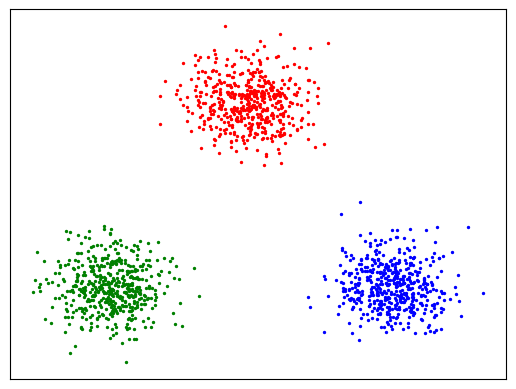

In [23]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset1)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset1[i][0], dataset1[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

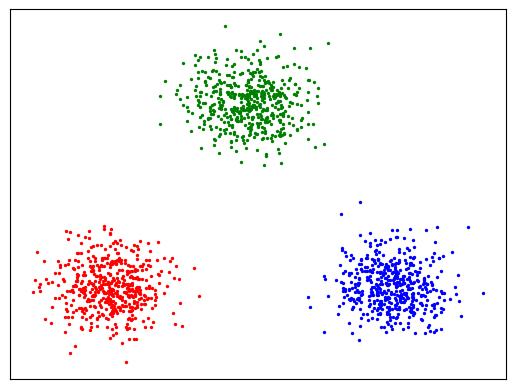

In [12]:
 model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset1)  # 先fit后predict，计算簇的中心->预测每个样本所属的簇类别
clusters = unique(yhat)  # 样本类别去重
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset1[row_ix, 0], dataset1[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

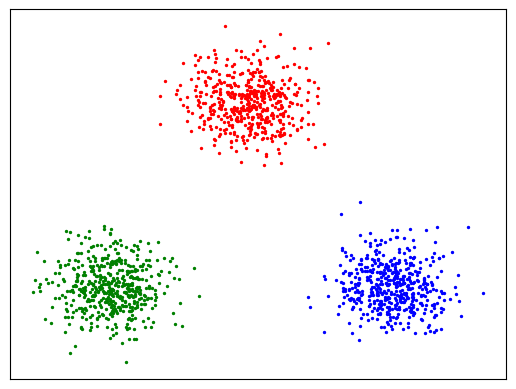

In [13]:
model = DBSCAN(eps=0.5, min_samples=5)  # eps领域
yhat = model.fit_predict(dataset1)  # 先fit后predict，计算簇的中心->预测每个样本所属的簇类别
clusters = unique(yhat) # 样本类别去重

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  # 属于该类别
    plt.scatter(dataset1[row_ix, 0], dataset1[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case Two : High-Covariance Case 

- 自下而上的层次聚类

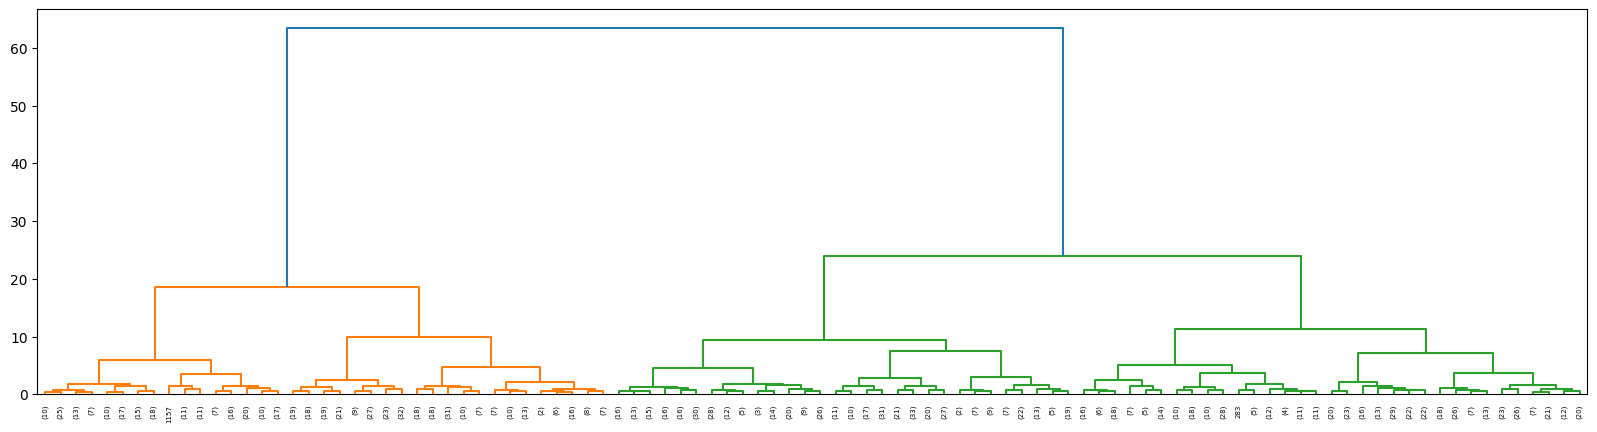

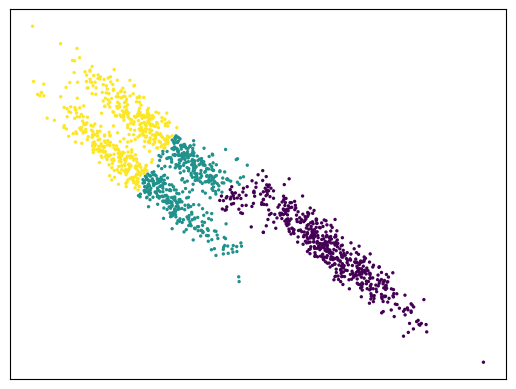

In [14]:
Z = linkage(dataset2, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(labels_1[: 100])  # 打印聚类结果
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
# print(labels_2[: 100])
# list(labels_1) == list(labels_2)  # 看看两种不同维度下得到的聚类结果是否一致

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset2[:, 0], dataset2[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

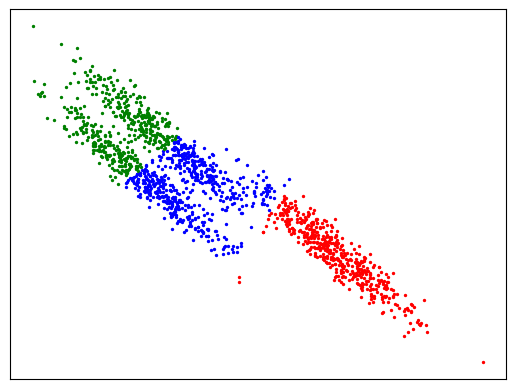

In [15]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset2)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset2[i][0], dataset2[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

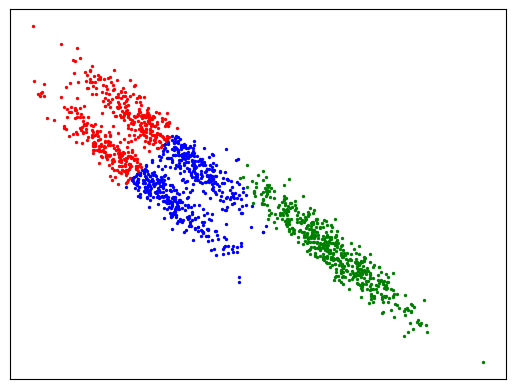

In [16]:
model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset2)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset2[row_ix, 0], dataset2[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

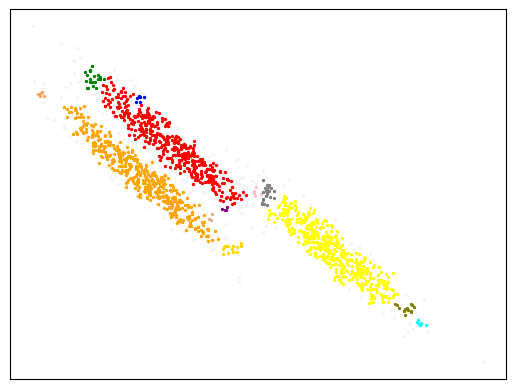

In [17]:
model = DBSCAN(eps=0.08, min_samples=5)  
yhat = model.fit_predict(dataset2)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset2[row_ix, 0], dataset2[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case Three : Unequal variance and Unequal size

- 自下而上的层次聚类

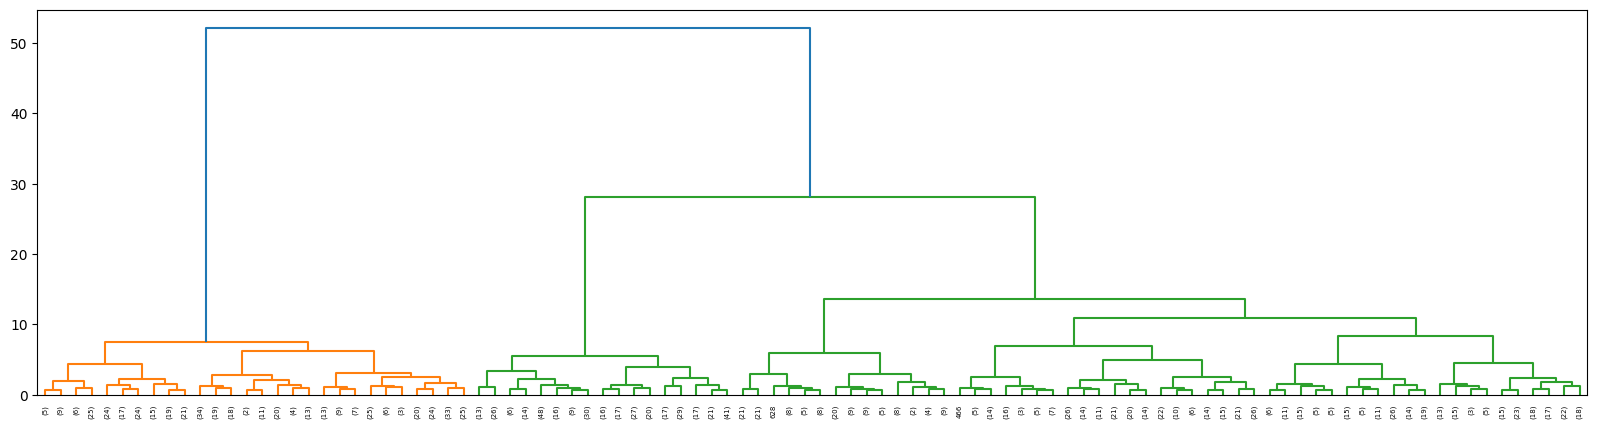

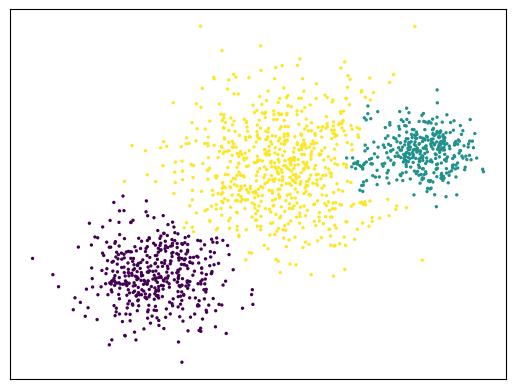

In [18]:
Z = linkage(dataset3, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(labels_1[: 100])  # 打印聚类结果
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
# print(labels_2[: 100])
# list(labels_1) == list(labels_2)  # 看看两种不同维度下得到的聚类结果是否一致

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset3[:, 0], dataset3[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

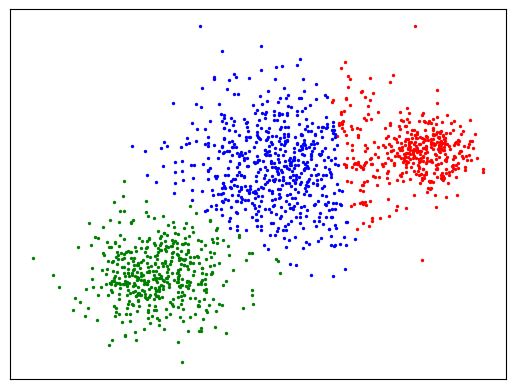

In [19]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset3)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset3[i][0], dataset3[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

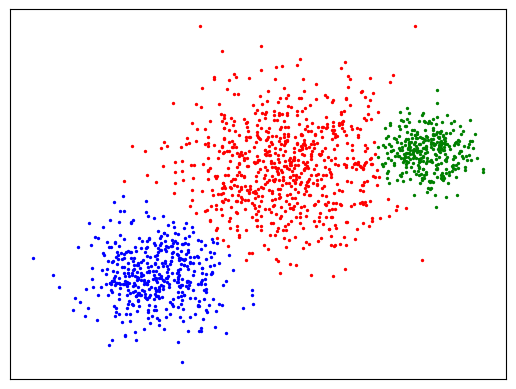

In [20]:
model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset3)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset3[row_ix, 0], dataset3[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

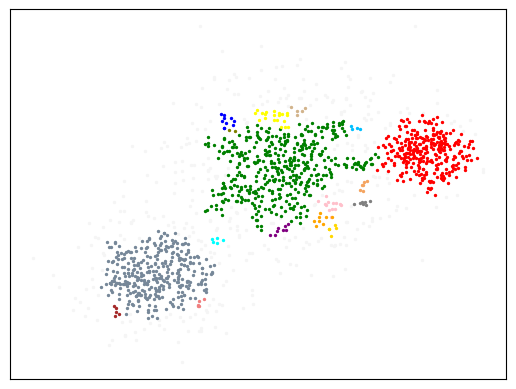

In [21]:
model = DBSCAN(eps=0.08, min_samples=5)  
yhat = model.fit_predict(dataset3)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset3[row_ix, 0], dataset3[row_ix, 1], color = colors[cluster],s=2)
plt.show()  

### Case Four : Ring Plot

- 自下而上的层次聚类

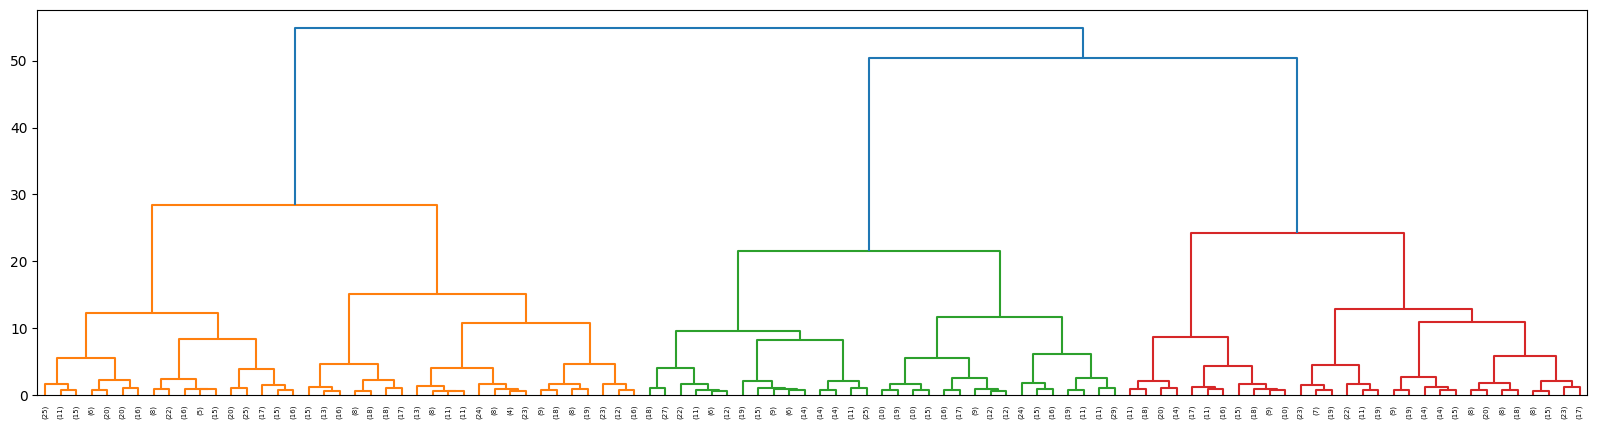

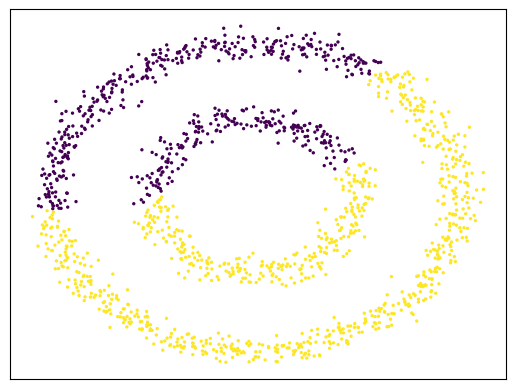

In [22]:
Z = linkage(dataset4, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(labels_1[: 100])  # 打印聚类结果
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 2
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
# print(labels_2[: 100])
# list(labels_1) == list(labels_2)  # 看看两种不同维度下得到的聚类结果是否一致

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset4[:, 0], dataset4[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

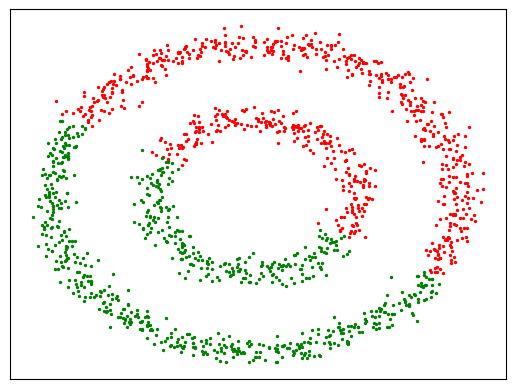

In [23]:
kmeans = KMeans(n_clusters = 2,max_iter=100).fit(dataset4)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset4[i][0], dataset4[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

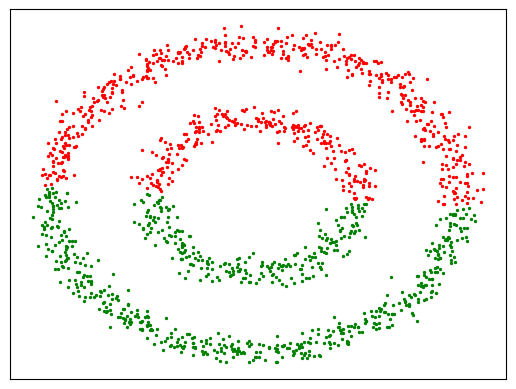

In [24]:
model = GaussianMixture(n_components=2)  
yhat = model.fit_predict(dataset4)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset4[row_ix, 0], dataset4[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

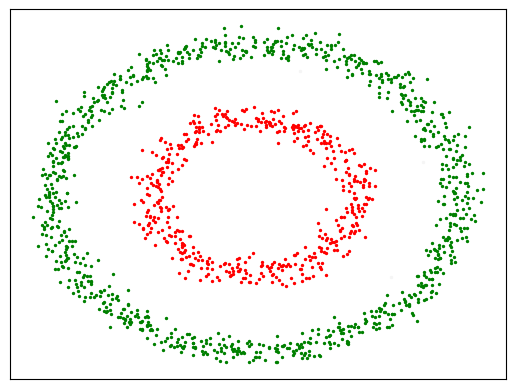

In [25]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset4)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset4[row_ix, 0], dataset4[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case Five : Wave Plot

-自下而上的层次聚类

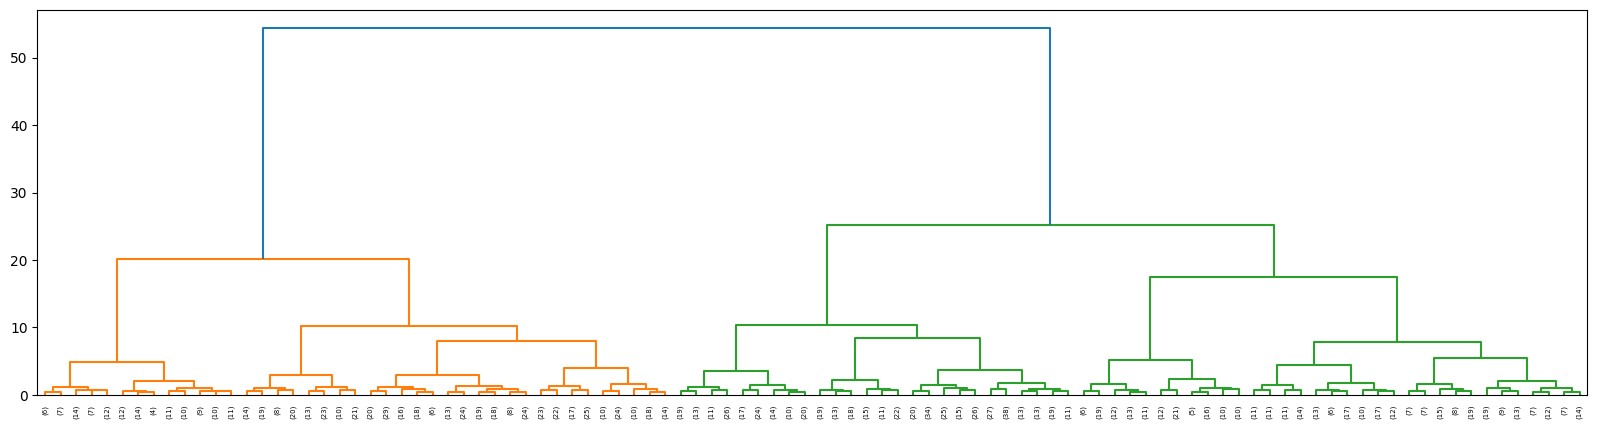

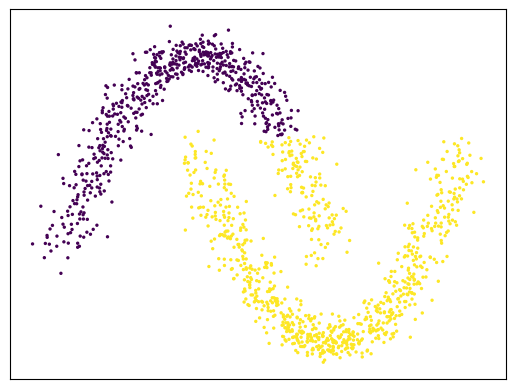

In [26]:
Z = linkage(dataset5, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 2
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset5[:, 0], dataset5[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

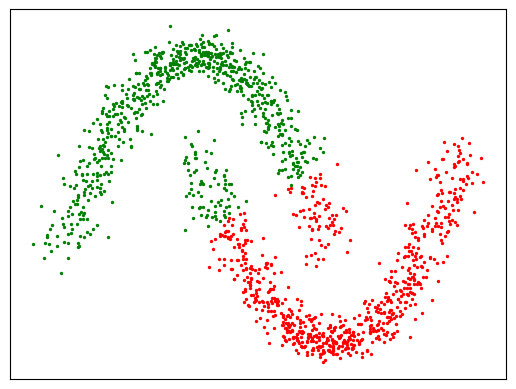

In [27]:
kmeans = KMeans(n_clusters = 2,max_iter=100).fit(dataset5)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset5[i][0], dataset5[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

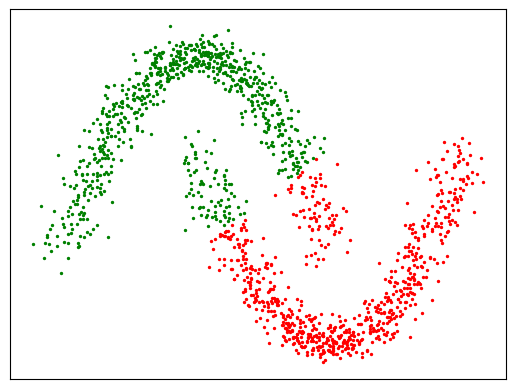

In [28]:
model = GaussianMixture(n_components=2)  
yhat = model.fit_predict(dataset5)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

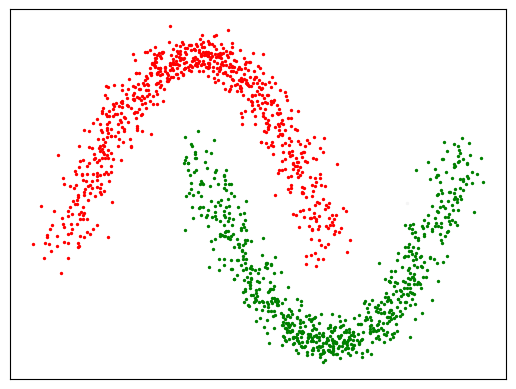

In [29]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset5)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### Case Six : Case from me

- 自下而上的层次聚类

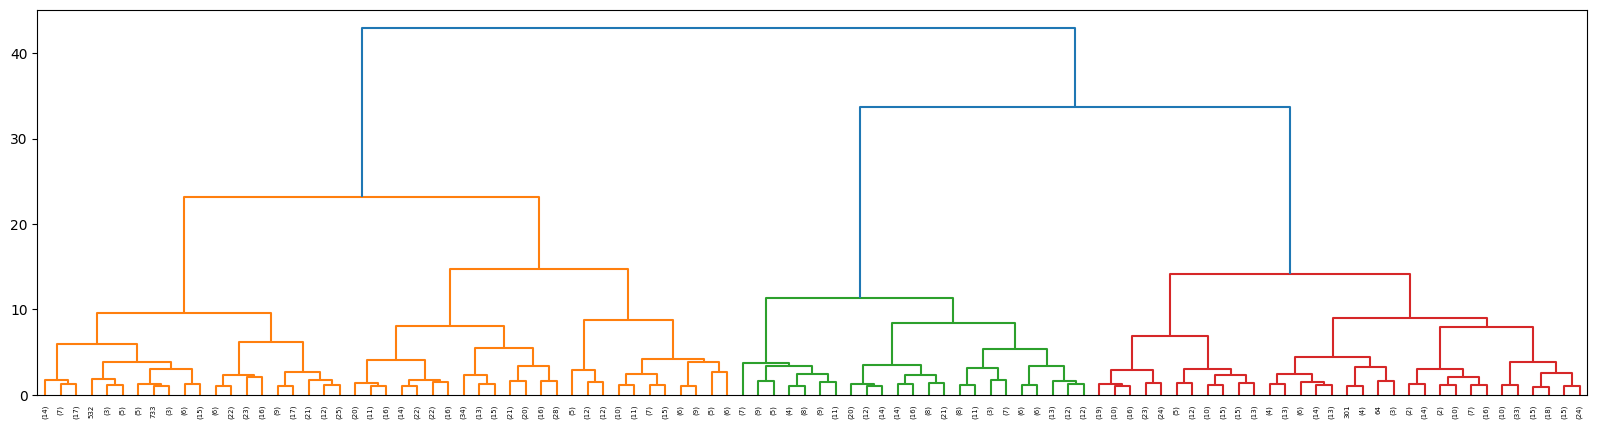

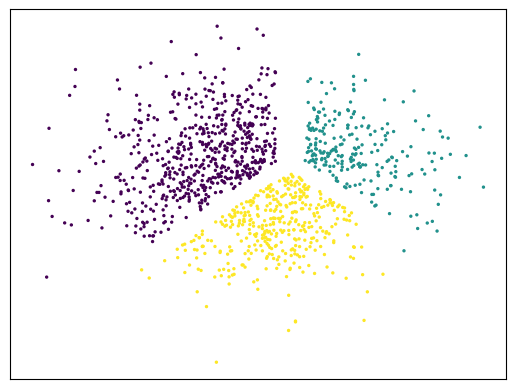

In [30]:
Z = linkage(dataset6, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 3
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset6[:, 0], dataset6[:, 1], c=labels_2,s=2)
plt.show()


- Kmeans

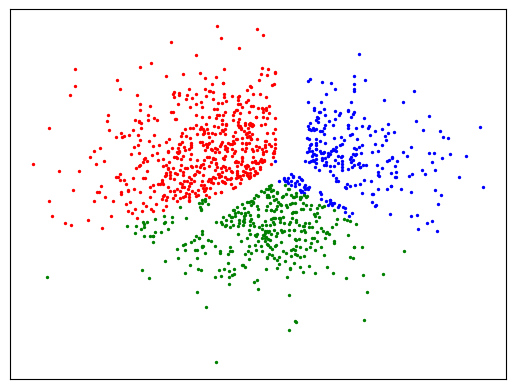

In [31]:
kmeans = KMeans(n_clusters = 3,max_iter=100).fit(dataset6)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset6[i][0], dataset6[i][1], color = colors[cluster],s=2)
plt.show()

- GMM

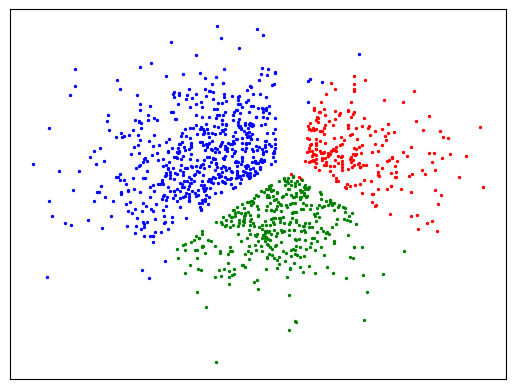

In [32]:
model = GaussianMixture(n_components=3)  
yhat = model.fit_predict(dataset6)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset6[row_ix, 0], dataset6[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

- DBSCAN

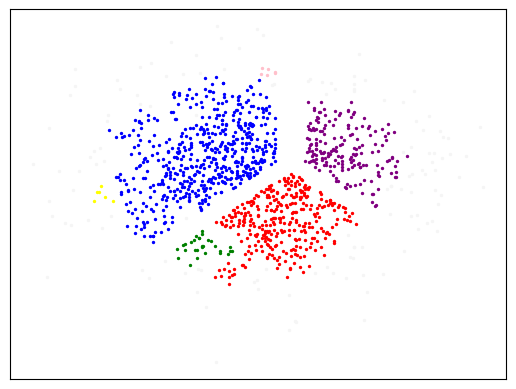

In [33]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset6)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset6[row_ix, 0], dataset6[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

## Task3：请用绘图的方式展示不同聚类方式的结果。

In [34]:
def all_cluster(dataset,k,eps):
    # 自下而上的层次聚类
    Z = linkage(dataset, method='ward', metric='euclidean')
    labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别
    plt.subplot(221)
    plt.title('Hierarchical Clustering')
    plt.xticks(())
    plt.yticks(())
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels_2,s=2)

    # Kmeans
    kmeans = KMeans(n_clusters = k,max_iter=100).fit(dataset)
    plt.subplot(222)
    plt.title('Kmeans')
    plt.xticks(())
    plt.yticks(())
    for i, cluster in enumerate(kmeans.labels_):
        plt.scatter(dataset[i][0], dataset[i][1], color = colors[cluster],s=2)

    # GMM 
    gmm = GaussianMixture(n_components=k)  
    yhat = gmm.fit_predict(dataset)  
    clusters = unique(yhat)  
    plt.subplot(223)
    plt.title('GMM')
    plt.xticks(())
    plt.yticks(())
    for cluster in clusters:  
        row_ix = where(yhat == cluster)  
        plt.scatter(dataset[row_ix, 0], dataset[row_ix, 1], color = colors[cluster],s=2)  

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    yhat = dbscan.fit_predict(dataset)  
    clusters = unique(yhat)  
    plt.subplot(224)
    plt.title('DBscan')
    plt.xticks(())
    plt.yticks(())
    for cluster in clusters:  
        row_ix = where(yhat == cluster)  
        plt.scatter(dataset[row_ix, 0], dataset[row_ix, 1], color = colors[cluster],s=2)  

    plt.show()  

### Case One : Simple Case (Equal Variance and Equal Size)

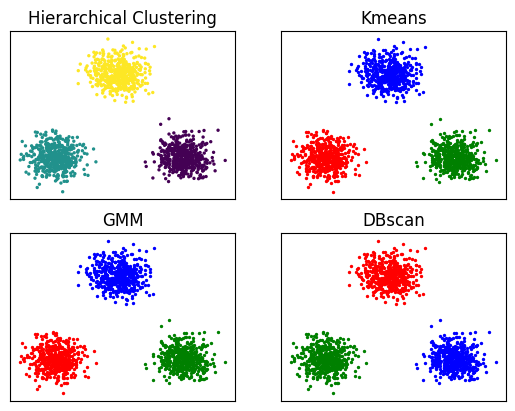

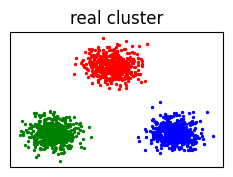

In [35]:
all_cluster(dataset1,3,0.5)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x11[:,0],x11[:,1],color="red",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="green",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="blue",s = 2)
plt.show()

### Case Two : High-Covariance Case

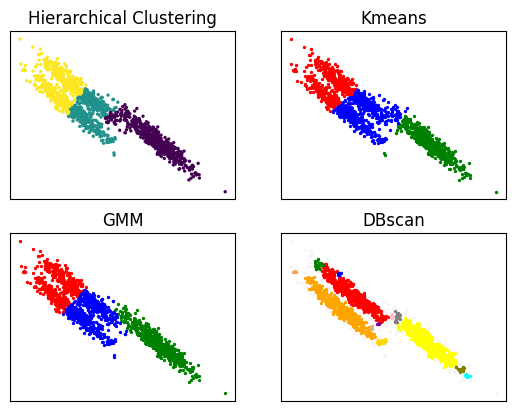

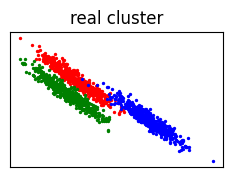

In [36]:
all_cluster(dataset2,3,0.08)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x21[:,0],x21[:,1],color="red",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="green",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="blue",s = 2)
plt.show()

### Case Three : Unequal variance and Unequal size

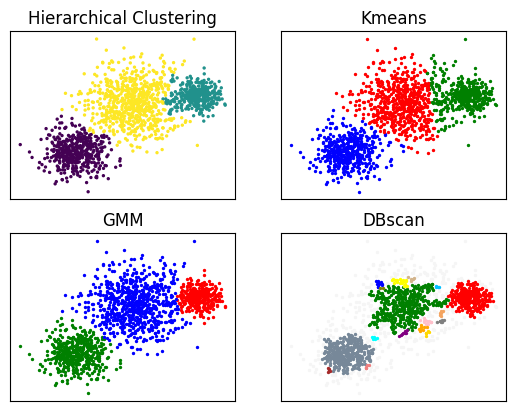

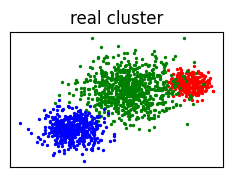

In [37]:
all_cluster(dataset3,3,0.08)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x31[:,0],x31[:,1],color="red",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="green",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="blue",s = 2)
plt.show()

### Case Four : Ring Plot

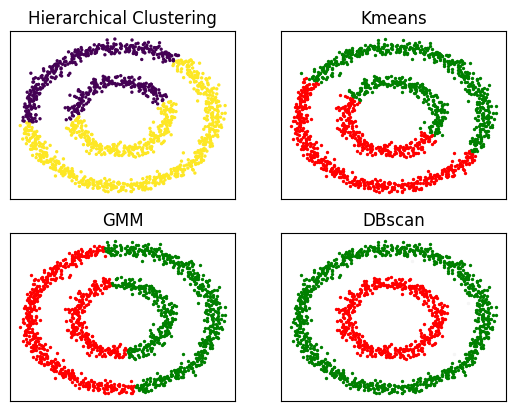

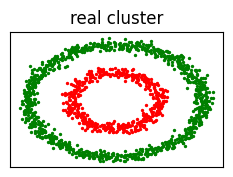

In [38]:
all_cluster(dataset4,2,0.18)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x41[:,0],x41[:,1],color="red",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="green",s = 2)
plt.show()

### Case Five : Wave Plot

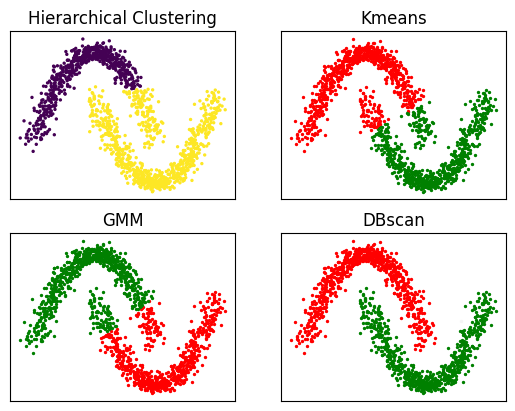

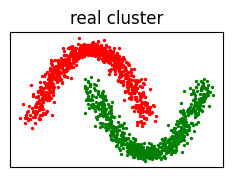

In [39]:
all_cluster(dataset5,2,0.18)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x51[:,0],x51[:,1],color="red",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="green",s = 2)
plt.show()

### Case Six : Case from me

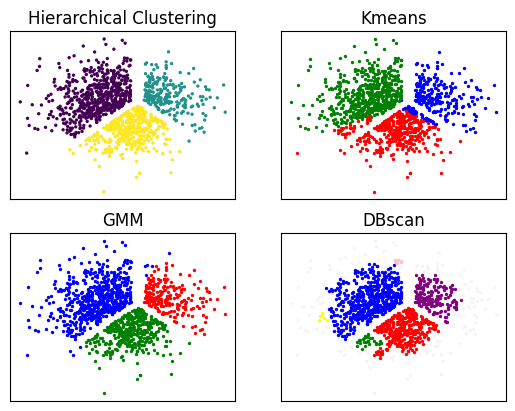

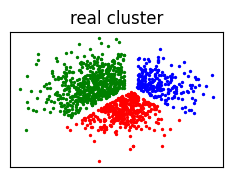

In [40]:
all_cluster(dataset6,3,0.18)

plt.figure(figsize=(2.75,1.75))
plt.xticks([])
plt.yticks([])
plt.title('real cluster')
plt.scatter(x61[:,0],x61[:,1],color="red",s = 2)
plt.scatter(x62[:,0],x62[:,1],color="green",s = 2)
plt.scatter(x63[:,0],x63[:,1],color="blue",s = 2)
plt.show()

## Task4：在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法。请写明具体的外（内）部聚类有效性的度量方法，并将计算结果请填入下表（结论保留小数点后4位有效数字）。

内部有效性主要取轮廓值，外部有效性主要取调和平均 V-measure。

其他方法的计算在后面有，但是没放在表中。

### Case One : Simple Case (Equal Variance and Equal Size)
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 1.0000                 </td>
        <td> 0.8049                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 1.0000                 </td>
        <td> 0.8049                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 1.0000                 </td>
        <td> 0.8049                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 1.0000                 </td>
        <td> 0.8049                 </td>
    </tr>
</table>

### Case Two : High-Covariance Case 
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.4901                 </td>
        <td> 0.4552                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.4557                 </td>
        <td> 0.4979                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.5293                 </td>
        <td> 0.4877                </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.7177                 </td>
        <td> -0.0514                 </td>
    </tr>
</table>

### Case Three : Unequal variance and Unequal size
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.8333                 </td>
        <td> 0.5076                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.7404                 </td>
        <td> 0.5232                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.8817                 </td>
        <td> 0.5002                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.5721                 </td>
        <td> -0.1323                 </td>
    </tr>
</table>

### Case Four : Ring Plot
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.0027                 </td>
        <td> 0.3289                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.0000                 </td>
        <td> 0.3652                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.0000                 </td>
        <td> 0.3652                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9894                 </td>
        <td> -0.0939                 </td>
    </tr>
</table>

### Case Five : Wave Plot
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.6406                 </td>
        <td> 0.5084                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.5164                 </td>
        <td> 0.5482                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.4941                 </td>
        <td> 0.5470                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9963                 </td>
        <td> 0.2155                 </td>
    </tr>
</table>

### Case Six : Case from me
<table width = c(100,500,500)>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td> 0.9947                 </td>
        <td> 0.3932                 </td>
    </tr>
      <tr>
        <td> Kmeans                 </td>
        <td> 0.7909                 </td>
        <td> 0.3858                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.9509                 </td>
        <td> 0.3876                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.7614                 </td>
        <td> 0.1230                 </td>
    </tr>
</table>

In [41]:
from sklearn import metrics
def inner_assess_cluster(dataset,k,eps):
    # 层次聚类
    Z = linkage(dataset, method='ward', metric='euclidean')
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Hierarchical Clustering：')
    print(f'  轮廓值：{metrics.silhouette_score(dataset, labels):.4f}')
    print(f'  CH指数：{metrics.calinski_harabasz_score(dataset, labels):.4f}')
    
    # Kmeans
    kmeans = KMeans(n_clusters=k,max_iter=100).fit(dataset)
    labels = kmeans.labels_
    print('Kmeans：')
    print(f'  轮廓值：{metrics.silhouette_score(dataset, labels):.4f}')
    print(f'  CH指数：{metrics.calinski_harabasz_score(dataset, labels):.4f}')

    # GMM 
    gmm = GaussianMixture(n_components=k)  
    labels = gmm.fit_predict(dataset)  
    print('GMM：')
    print(f'  轮廓值：{metrics.silhouette_score(dataset, labels):.4f}')
    print(f'  CH指数：{metrics.calinski_harabasz_score(dataset, labels):.4f}')

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    labels = dbscan.fit_predict(dataset)  
    print('DBSCAN：')
    print(f'  轮廓值：{metrics.silhouette_score(dataset, labels):.4f}')
    print(f'  CH指数：{metrics.calinski_harabasz_score(dataset, labels):.4f}')   
    
def outer_assess_cluster(dataset,y_labels,k,eps):
    # 层次聚类
    Z = linkage(dataset, method='ward', metric='euclidean')
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Hierarchical Clustering：')
    print(f'  兰德指数：{metrics.adjusted_rand_score(y_labels, labels):.4f}')
    print(f'  互信息：{metrics.adjusted_mutual_info_score(y_labels, labels):.4f}')
    print(f'  同质性 homogeneity：{metrics.homogeneity_score(y_labels, labels):.4f}')
    print(f'  完整性 completeness：{metrics.completeness_score(y_labels, labels):.4f}')
    print(f'  调和平均 V-measure：{metrics.v_measure_score(y_labels, labels):.4f}')
    print(f'  FMI指数：{metrics.fowlkes_mallows_score(y_labels, labels):.4f}')
    
    # Kmeans
    kmeans = KMeans(n_clusters=k,max_iter=100).fit(dataset)
    labels = kmeans.labels_
    print('Kmeans：')
    print(f'  兰德指数：{metrics.adjusted_rand_score(y_labels, labels):.4f}')
    print(f'  互信息：{metrics.adjusted_mutual_info_score(y_labels, labels):.4f}')
    print(f'  同质性 homogeneity：{metrics.homogeneity_score(y_labels, labels):.4f}')
    print(f'  完整性 completeness：{metrics.completeness_score(y_labels, labels):.4f}')
    print(f'  调和平均 V-measure：{metrics.v_measure_score(y_labels, labels):.4f}')
    print(f'  FMI指数：{metrics.fowlkes_mallows_score(y_labels, labels):.4f}')

    # GMM 
    gmm = GaussianMixture(n_components=k)  
    labels = gmm.fit_predict(dataset)  
    print('GMM：')
    print(f'  兰德指数：{metrics.adjusted_rand_score(y_labels, labels):.4f}')
    print(f'  互信息：{metrics.adjusted_mutual_info_score(y_labels, labels):.4f}')
    print(f'  同质性 homogeneity：{metrics.homogeneity_score(y_labels, labels):.4f}')
    print(f'  完整性 completeness：{metrics.completeness_score(y_labels, labels):.4f}')
    print(f'  调和平均 V-measure：{metrics.v_measure_score(y_labels, labels):.4f}')
    print(f'  FMI指数：{metrics.fowlkes_mallows_score(y_labels, labels):.4f}')

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    labels = dbscan.fit_predict(dataset)  
    print('DBSCAN：')
    print(f'  兰德指数：{metrics.adjusted_rand_score(y_labels, labels):.4f}')
    print(f'  互信息：{metrics.adjusted_mutual_info_score(y_labels, labels):.4f}')
    print(f'  同质性 homogeneity：{metrics.homogeneity_score(y_labels, labels):.4f}')
    print(f'  完整性 completeness：{metrics.completeness_score(y_labels, labels):.4f}')
    print(f'  调和平均 V-measure：{metrics.v_measure_score(y_labels, labels):.4f}')
    print(f'  FMI指数：{metrics.fowlkes_mallows_score(y_labels, labels):.4f}') 

### 内部聚类有效性

In [42]:
print('Case1 ----------------------------------')
inner_assess_cluster(dataset1,3,0.5)
print('Case2 ----------------------------------')
inner_assess_cluster(dataset2,3,0.08)
print('Case3 ----------------------------------')
inner_assess_cluster(dataset3,3,0.08)
print('Case4 ----------------------------------')
inner_assess_cluster(dataset4,2,0.18)
print('Case5 ----------------------------------')
inner_assess_cluster(dataset5,2,0.18)
print('Case6 ----------------------------------')
inner_assess_cluster(dataset6,3,0.18)

Case1 ----------------------------------
Hierarchical Clustering：
  轮廓值：0.8049
  CH指数：11330.5712
Kmeans：
  轮廓值：0.8049
  CH指数：11330.5712
GMM：
  轮廓值：0.8049
  CH指数：11330.5712
DBSCAN：
  轮廓值：0.8049
  CH指数：11330.5712
Case2 ----------------------------------
Hierarchical Clustering：
  轮廓值：0.4552
  CH指数：3294.5671
Kmeans：
  轮廓值：0.4979
  CH指数：3974.6876
GMM：
  轮廓值：0.4877
  CH指数：3658.2350
DBSCAN：
  轮廓值：-0.0514
  CH指数：332.3164
Case3 ----------------------------------
Hierarchical Clustering：
  轮廓值：0.5076
  CH指数：2927.9969
Kmeans：
  轮廓值：0.5232
  CH指数：3206.0208
GMM：
  轮廓值：0.5002
  CH指数：2839.9626
DBSCAN：
  轮廓值：-0.1323
  CH指数：183.7668
Case4 ----------------------------------
Hierarchical Clustering：
  轮廓值：0.3289
  CH指数：749.7283
Kmeans：
  轮廓值：0.3652
  CH指数：912.3194
GMM：
  轮廓值：0.3652
  CH指数：912.3199
DBSCAN：
  轮廓值：-0.0939
  CH指数：0.7220
Case5 ----------------------------------
Hierarchical Clustering：
  轮廓值：0.5084
  CH指数：2212.5564
Kmeans：
  轮廓值：0.5482
  CH指数：2700.6193
GMM：
  轮廓值：0.5470
  CH指数：2691.1014
DBSC

### 外部聚类有效性

In [43]:
print('Case1 Simple Case (Equal Variance and Equal Size)----------------------------------')
outer_assess_cluster(dataset1,y1_labels,3,0.5)
print('Case2 High-Covariance Case ----------------------------------')
outer_assess_cluster(dataset2,y2_labels,3,0.08)
print('Case3 Unequal variance and Unequal size----------------------------------')
outer_assess_cluster(dataset3,y3_labels,3,0.08)
print('Case4 Ring Plot----------------------------------')
outer_assess_cluster(dataset4,y4_labels,2,0.18)
print('Case5 Wave Plot----------------------------------')
outer_assess_cluster(dataset5,y5_labels,2,0.18)
print('Case6 Case from me----------------------------------')
outer_assess_cluster(dataset6,y6_labels,3,0.18)

Case1 Simple Case (Equal Variance and Equal Size)----------------------------------
Hierarchical Clustering：
  兰德指数：1.0000
  互信息：1.0000
  同质性 homogeneity：1.0000
  完整性 completeness：1.0000
  调和平均 V-measure：1.0000
  FMI指数：1.0000
Kmeans：
  兰德指数：1.0000
  互信息：1.0000
  同质性 homogeneity：1.0000
  完整性 completeness：1.0000
  调和平均 V-measure：1.0000
  FMI指数：1.0000
GMM：
  兰德指数：1.0000
  互信息：1.0000
  同质性 homogeneity：1.0000
  完整性 completeness：1.0000
  调和平均 V-measure：1.0000
  FMI指数：1.0000
DBSCAN：
  兰德指数：1.0000
  互信息：1.0000
  同质性 homogeneity：1.0000
  完整性 completeness：1.0000
  调和平均 V-measure：1.0000
  FMI指数：1.0000
Case2 High-Covariance Case ----------------------------------
Hierarchical Clustering：
  兰德指数：0.4506
  互信息：0.4895
  同质性 homogeneity：0.4899
  完整性 completeness：0.4903
  调和平均 V-measure：0.4901
  FMI指数：0.6337
Kmeans：
  兰德指数：0.4017
  互信息：0.4551
  同质性 homogeneity：0.4544
  完整性 completeness：0.4571
  调和平均 V-measure：0.4557
  FMI指数：0.6022
GMM：
  兰德指数：0.4728
  互信息：0.5288
  同质性 homogeneity：0.5286
  完整性 completene

### Task5：通过本次实验，评述各类聚类方法的使用范围。

1. 层次聚类是将每个样本分为一类，后计算两两之间的欧氏距离（我的层次聚类中使用的是欧氏距离）再将两两聚为一类，重复多次最终归为一类。

- 图形上来看，层次聚类将Case1和Case6几乎正确分类了，其中Case6属于不规则图形。

- 外部评价上来看，在Case6上表现较好。

- 内部评价上来看，在Case2、Case3、Case4、Case6上表现较好。

层次聚类适用于任何形状，且不确定类别数的情况。

2. Kmeans聚类是事先规定好类别数k，后确定k个类别中心，计算其他点与中心点的欧氏距离（我的Kmeans聚类中使用的是欧氏距离），后根据距离来归类，每次取类中点的样本均值作为类中心点计算。

- 图形上来看，kmeans将Case1正确分类了，而Case6还差一点。

- 外部评价上来看，kmeans中规中矩，表现相较于其他不好不差。

- 内部评价上来看，在Case2、Case3、Case4和Case5上表现较好。

kmeans适用于形状是规则的，多数属于凸数据集，且类别数和中心点能大致确定或猜测出来的情况。

3. 混合高斯模型GMM聚类是通过混合高斯模型，在给定的类别数下，通过EM算法，迭代依次算出每个样本由每个类生成的概率（E步），再M步计算新的模型参数，继续迭代，最后找出每个样本最适配的类使得概率最大。

- 图形上来看，GMM将Case1正确分类了，而Case3和Case5的聚类表现比其他方法好一点（除了Case5的DBSCAN）。

- 外部评价上来看，在Case3和Case6上表现较好。

- 内部评价上来看，在Case4和Case5上表现较好（离最佳的只差一点点）。

适用于在kmeans确定类别数之后再运行。

4. DBSCAN聚类是在给定的领域半径eps和最少样本个数minp下，找到彼此距离eps内任意minp以上的点，归为一类。

- 图形上来看，DBSCAN在Case2、Case4和Case5上表现较好，4和5正确分类。

- 外部评价上来看，在Case2、Case4和Case5上表现较好。

- 内部评价上来看，均表现较差。

可以发现，Case2、Case4和Case5都是较稠密且非凸的，因此DBSCAN适用于较稠密且非凸的数据集。

### Task6：（选做）复现层次聚类、Kmeans、GMM、DBSCAN的代码。复现指的是通过理解原始代码的逻辑和功能，重新编写出一个具有相同功能的代码，只能使用最基础的包，如numpy、math等。

参考资料：https://scikit-learn.org/stable/modules/clustering.html#clustering

#### 我以老师给的第五个数据集为例进行复现

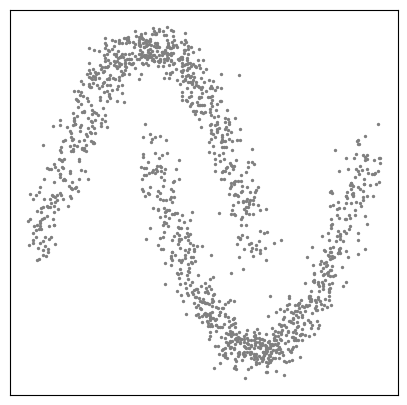

In [11]:
## Case Five : Wave Plot
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="grey",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="grey",s = 2)


y51=[0 for i in range(n_subset)]
y52=[1 for i in range(n_subset)]
y5_labels=y51+y52

- 自下而上的层次聚类

### 调包

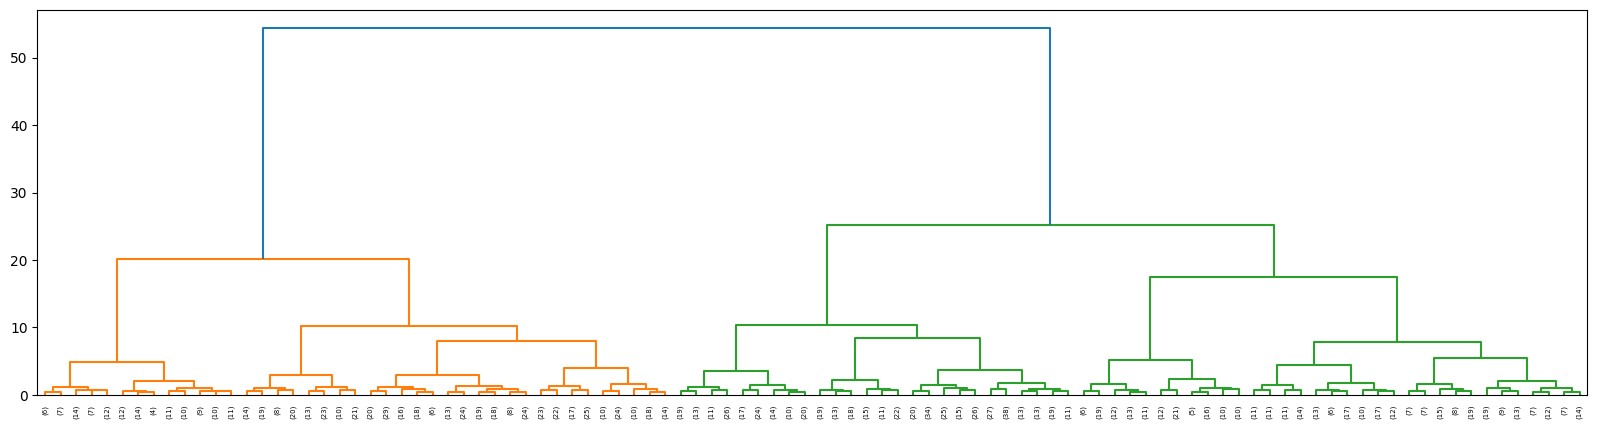

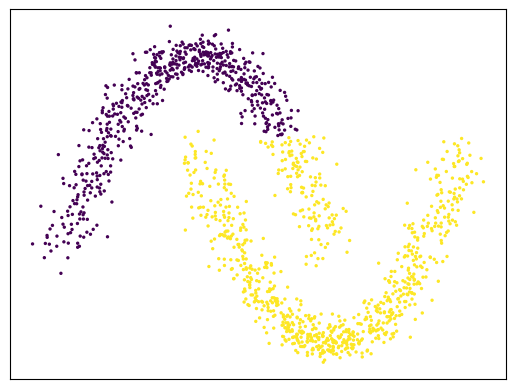

In [25]:
from scipy.cluster.hierarchy import linkage     #导入linage函数用于层次聚类
from scipy.cluster.hierarchy import dendrogram  #dendrogram函数用于将聚类结果绘制成树状图
from scipy.cluster.hierarchy import fcluster    #fcluster函数用于提取出聚类的结果
from sklearn.cluster import AgglomerativeClustering  #自底向上层次聚类算法

Z = linkage(dataset5, method='ward', metric='euclidean')
plt.figure(figsize=(20, 5))
dendrogram(Z, truncate_mode='lastp', p=100) # 截断显示，不然1500个太多了，完全看不清
plt.show()

# #根据临界距离返回聚类结果
# d = 15
# labels_1 = fcluster(Z, t=d, criterion='distance')
# print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

#根据聚类数目返回聚类结果
k = 2
labels_2 = fcluster(Z, t=k, criterion='maxclust') # 输出每一个特征的类别

plt.figure()
plt.xticks(())
plt.yticks(())
plt.scatter(dataset5[:, 0], dataset5[:, 1], c=labels_2,s=2)
plt.show()


### 自己实现

#### 因为使用原本的数据集实在是太慢了所以自己创造了一个新的数据集

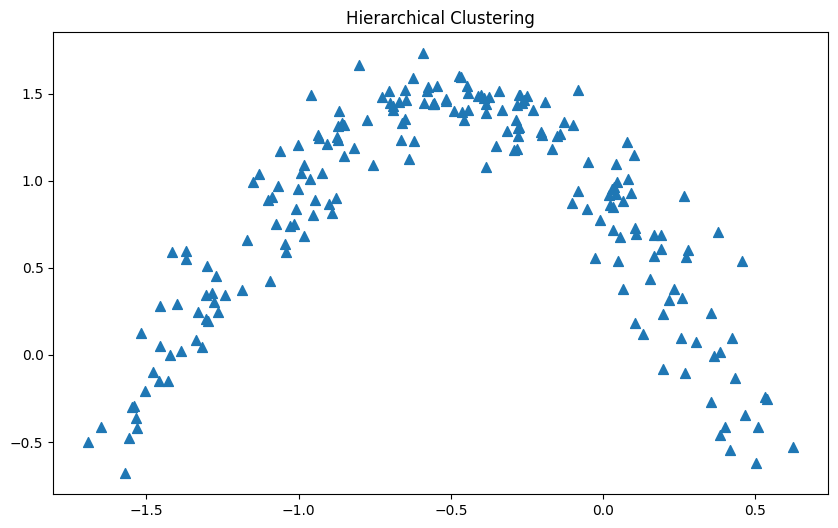

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Hierarchical clustering implementation
class HierarchicalClustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.labels_ = None

    def fit(self, X):
        # Initialize labels and distance matrix
        self.labels_ = np.arange(X.shape[0])
        dist_matrix = np.full((X.shape[0], X.shape[0]), np.inf)
        for i in range(X.shape[0]):
            for j in range(i+1, X.shape[0]):
                dist_matrix[i, j] = dist_matrix[j, i] = np.linalg.norm(X[i] - X[j])
        
        # Initialize clusters
        clusters = {i: [i] for i in range(X.shape[0])}
        
        # Hierarchical clustering
        while len(clusters) > self.n_clusters:
            # Find the two closest clusters
            min_dist = np.inf
            for i in clusters:
                for j in clusters:
                    if i != j and dist_matrix[i, j] < min_dist:
                        min_dist = dist_matrix[i, j]
                        closest = (i, j)

            # Merge the two closest clusters
            i, j = closest
            new_cluster = clusters[i] + clusters[j]
            for k in new_cluster:
                self.labels_[k] = i  # Update labels
            clusters[i] = new_cluster
            del clusters[j]

            # Update distance matrix
            for k in clusters:
                if k != i:
                    min_dist = min(dist_matrix[i, k], dist_matrix[j, k])
                    dist_matrix[i, k] = dist_matrix[k, i] = min_dist
            dist_matrix[j, :] = dist_matrix[:, j] = np.inf
        
        return self.labels_

# Create the dataset
n_samples = 400
a = 1/(-1.2+0.5)**2
n_subset = int(n_samples/2)

x = np.linspace(-1.5, 0.5, n_subset)
y1 = (-a)*(x + 0.5)**2 + 1.5
y2 = (a)*(-x - 0.5)**2 - 1.5
z1 = np.random.normal(loc=0, scale=0.1, size=(n_subset, 2))
z2 = np.random.normal(loc=0, scale=0.1, size=(n_subset, 2))

x51 = np.c_[x, y1] + z1
x52 = np.c_[-x, y2] + z2
dataset5 = np.r_[x51, x52]

# Perform hierarchical clustering
hc = HierarchicalClustering(n_clusters=3)
labels = hc.fit(dataset5)

# Plot the results
plt.figure(figsize=(10, 6))
for i, marker in zip(range(3), ['^', 'o', 's']):
    plt.scatter(dataset5[labels == i, 0], dataset5[labels == i, 1], s=50, marker=marker)

plt.title('Hierarchical Clustering')
plt.show()


- Kmeans

### 调包

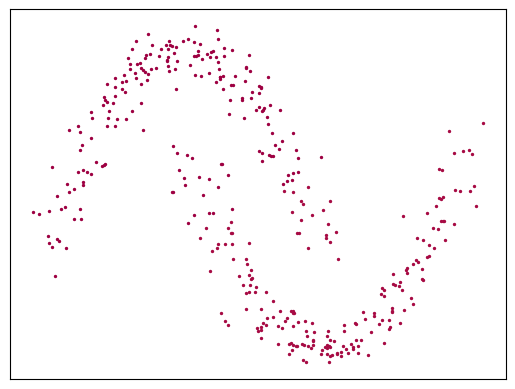

In [33]:
kmeans = KMeans(n_clusters = 2,max_iter=100).fit(dataset5)

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset5[i][0], dataset5[i][1], color = colors[cluster],s=2)
plt.show()

### 自己实现

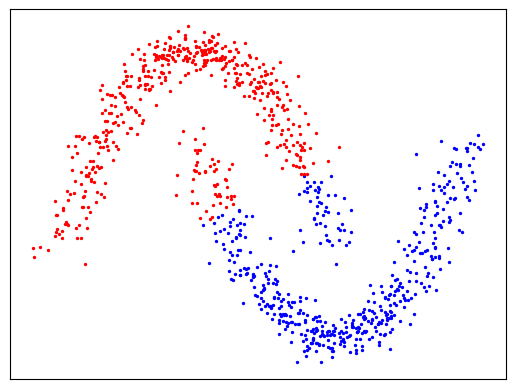

In [28]:
import matplotlib.pyplot as plt

# Let's modify the KMeans class to include a 'labels_' attribute for compatibility.
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.labels_ = None
        self.centroids = None

    def initialize_centroids(self, X):
        np.random.seed(42)  # for reproducible results
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels_ = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels_)
            if np.allclose(old_centroids, self.centroids):
                break
        return self

# Create the dataset as per the provided code snippet
n_samples = 1000
a = 1/(-1.2+0.5)**2
n_subset = int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]

# Now apply the KMeans algorithm
kmeans = KMeans(n_clusters=2, max_iter=100).fit(dataset5)

# Plot the results
colors = ['red', 'blue']

plt.figure()
plt.xticks(())
plt.yticks(())
for i, cluster in enumerate(kmeans.labels_):
    plt.scatter(dataset5[i][0], dataset5[i][1], color=colors[cluster], s=2)
plt.show()


- GMM

### 调包

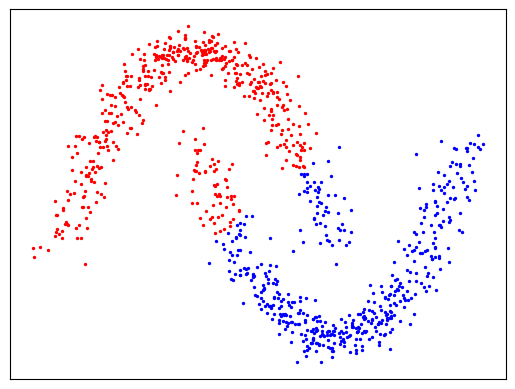

In [29]:
model = GaussianMixture(n_components=2)  
yhat = model.fit_predict(dataset5)  
clusters = unique(yhat)  
  
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1], color = colors[cluster],s=2)  
plt.show()  

### 自己实现

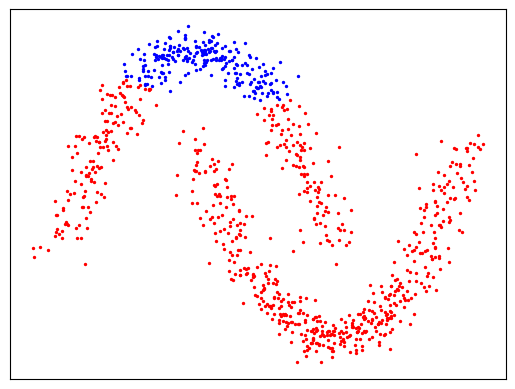

In [30]:
# 重新定义GMM类，因为之前的定义可能没有执行
class GaussianMixtureModel:
    """
    自定义的高斯混合模型（GMM）类。
    """

    def __init__(self, n_components, tol=1e-3, max_iter=100):
        self.n_components = n_components  # 高斯分量的数量
        self.tol = tol  # 迭代停止的容忍度
        self.max_iter = max_iter  # 最大迭代次数

        # 初始化参数
        self.means = None
        self.covariances = None
        self.weights = None
        self.responsibilities = None

    def _initialize(self, X):
        """
        初始化模型参数。
        """
        n_samples, _ = X.shape
        # 随机选择初始均值
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]

        # 初始化协方差矩阵为单位矩阵
        self.covariances = [np.eye(X.shape[1]) for _ in range(self.n_components)]

        # 均匀初始化权重
        self.weights = np.ones(self.n_components) / self.n_components

    def _e_step(self, X):
        """
        E步骤：计算每个数据点属于每个高斯分量的责任度。
        """
        self.responsibilities = np.zeros((X.shape[0], self.n_components))

        for k in range(self.n_components):
            self.responsibilities[:, k] = self.weights[k] * self._gaussian(X, self.means[k], self.covariances[k])

        self.responsibilities /= self.responsibilities.sum(axis=1, keepdims=True)

    def _m_step(self, X):
        """
        M步骤：更新模型的均值、协方差和权重。
        """
        n_samples = X.shape[0]

        for k in range(self.n_components):
            resp = self.responsibilities[:, k]

            # 更新均值
            self.means[k] = (X * resp[:, np.newaxis]).sum(axis=0) / resp.sum()

            # 更新协方差
            diff = X - self.means[k]
            self.covariances[k] = np.dot(resp * diff.T, diff) / resp.sum()

            # 更新权重
            self.weights[k] = resp.sum() / n_samples

    def _gaussian(self, X, mean, cov):
        """
        计算多维高斯分布。
        """
        n_features = X.shape[1]
        diff = X - mean
        return np.exp(-0.5 * np.sum(np.dot(diff, np.linalg.inv(cov)) * diff, axis=1)) / (
            np.sqrt((2 * np.pi) ** n_features * np.linalg.det(cov)))

    def fit(self, X):
        """
        训练模型。
        """
        self._initialize(X)

        for _ in range(self.max_iter):
            prev_means = self.means.copy()

            # E步骤
            self._e_step(X)

            # M步骤
            self._m_step(X)

            # 检查收敛
            if np.linalg.norm(self.means - prev_means) < self.tol:
                break

    def predict(self, X):
        """
        预测每个样本的类别。
        """
        self._e_step(X)
        return self.responsibilities.argmax(axis=1)

# 使用数据集5创建并训练高斯混合模型
gmm_model = GaussianMixtureModel(n_components=2)
gmm_model.fit(dataset5)

# 预测每个样本的类别
yhat_gmm = gmm_model.predict(dataset5)
clusters_gmm = unique(yhat_gmm)

# 绘制聚类结果
colors = ['red', 'blue']
plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters_gmm:
    row_ix = where(yhat_gmm == cluster)
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1], color=colors[cluster], s=2)
plt.show()


- DBSCAN

### 调包

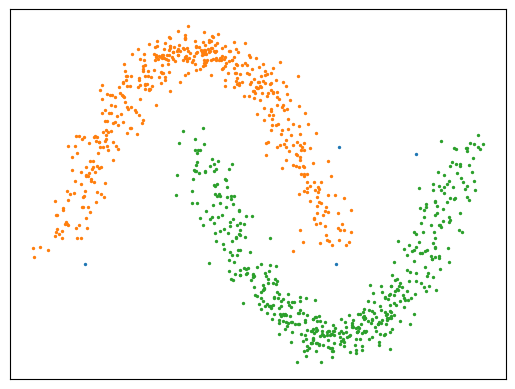

In [31]:
model = DBSCAN(eps=0.18, min_samples=5)  
yhat = model.fit_predict(dataset5)  
clusters = unique(yhat)  

plt.figure()
plt.xticks(())
plt.yticks(())
for cluster in clusters:  
    row_ix = where(yhat == cluster)  
    plt.scatter(dataset5[row_ix, 0], dataset5[row_ix, 1],s=2)  
plt.show()  

### 自己实现

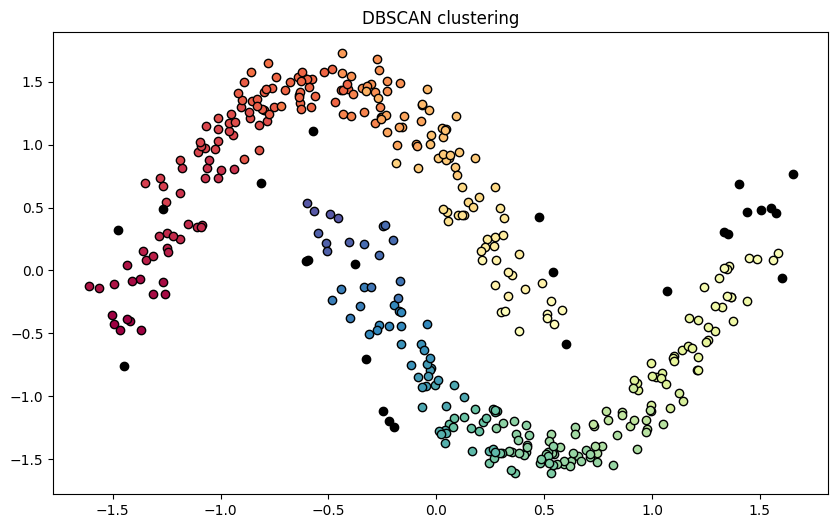

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Redefining the DBSCAN algorithm
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
    
    def fit_predict(self, X):
        # Initialize all points as noise initially
        labels = np.full(X.shape[0], -1)
        C = 0

        for P in range(0, X.shape[0]):
            if not (labels[P] == -1):
                continue  # Previously processed in inner loop
            neighbor_pts = self.region_query(X, P)
            if len(neighbor_pts) < self.min_samples:
                # Mark point as noise
                labels[P] = -1
            else:
                C += 1
                self.grow_cluster(X, labels, P, neighbor_pts, C)
        
        return labels

    def grow_cluster(self, X, labels, P, neighbor_pts, C):
        # Assign the cluster label to the seed point
        labels[P] = C
        i = 0
        while i < len(neighbor_pts):            
            Pn = neighbor_pts[i]
            if labels[Pn] == -1:
                labels[Pn] = C
            elif labels[Pn] == 0:
                labels[Pn] = C
                Pn_neighbor_pts = self.region_query(X, Pn)
                if len(Pn_neighbor_pts) >= self.min_samples:
                    neighbor_pts = neighbor_pts + Pn_neighbor_pts
            i += 1

    def region_query(self, X, P):
        neighbors = []
        for Pn in range(0, X.shape[0]):
            # If it's within eps radius, it's a neighbor
            if np.linalg.norm(X[P] - X[Pn]) < self.eps:
                neighbors.append(Pn)
        return neighbors

# Create the dataset
n_samples = 400
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]

# Run the DBSCAN clustering
db = DBSCAN(eps=0.18, min_samples=5)
labels = db.fit_predict(dataset5)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = dataset5[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN clustering')
plt.show()
